In [5]:
# (c) 2021-2024 The Johns Hopkins University Applied Physics Laboratory LLC (JHU/APL).

import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.insert(1, '../training/')
from utils_resnetN import get_best_weights

In [14]:
dataset= 'CIFAR10'
model_types = ['resnet20', 'resnet32', 'resnet44', 'resnet56', 'resnet110']
#model_types = ['resnet32']

In [15]:
def get_relevant_data(logs):
    agg_data = {
        "conv" : [],
        "gelu" : [],
        "bootstrapping" : [],
        "residual"  : [],
        "pool" : [],
        "linear" : [],
        "total" : []
    }
    resolutions = []

    for idx, log in enumerate(logs):
        try:
            with open(log) as f:
                contents = json.load(f)
        except FileNotFoundError:
            print("%s does not exist." % log)

        # Aggregated time information
        conv = sum(contents["Conv"])
        gelu = sum(contents["GELU"])
        bootstrapping = sum(contents["Bootstrapping"])
        residual = sum(contents["Residual"])
        pool = sum(contents["Pool"])
        linear = sum(contents["Linear"])
        total = conv + gelu + bootstrapping + residual + pool + linear

        pred, truth = contents['decrypted logits'], contents['unencrypted logits']
        resolution = [truth[i]-pred[i] for i in range(len(truth))]

        agg_data["conv"].append(conv)
        agg_data["gelu"].append(gelu)
        agg_data["bootstrapping"].append(bootstrapping)
        agg_data["residual"].append(residual)
        agg_data["pool"].append(pool)
        agg_data["linear"].append(linear)
        agg_data["total"].append(total)
        resolutions.append(resolution)
    return agg_data, resolutions

def stats(data):
    if len(data)==0:
        print("This should never happen...")
        return 0,0
    mean = sum(data) / len(data)
    variance = sum((d - mean)**2 for d in data) / len(data)
    std = variance ** 0.5
    return mean, std

def print_stats(model_type, agg_data, resolutions):
    print(f'{model_type:17s} {"Mean":8.4s} {"Std.":6.7s} {"Percentage":7.19s}')
    idx = 0
    sum_percent = 0.0
    
    for key, val in agg_data.items():
        mean, std = stats(val)
        avg_total = sum(agg_data["total"]) / len(agg_data["total"])
        percent = 100*mean/avg_total
        if key!='total':
            sum_percent += round(percent,1) 

        print(f'{key:15s} {round(mean,0):7.3f} {std:7.3f} {round(percent,1):10.2f}')
        idx+=1

    print(f'{"rounded percent":15s} {sum_percent:7.3f}')
    resolutions = np.array(resolutions).flatten()
    mean, std = stats(resolutions)
    print(f'{"logit res":15s} {mean:7.3f} {std:7.3f}')
    print("\n")
    
def plot(data, bins, xlabel):
    plt.hist(data, bins=bins, color='black', alpha=0.8)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

Finding the best model according to logs...
{'weights': 'weights/resnet20_cifar10', 'model_type': 'resnet20', 'kwargs': {'num_classes': 10, 'debug': False}, 'params': {'epochs': 100, 'batch_size': 256, 'momentum': 0.9, 'weight_decay': 0.256, 'weight_decay_bias': 0.004, 'ema_update_freq': 5, 'ema_rho': 0.9509900498999999, 'model_type': 'resnet20', 'kwargs': {'num_classes': 10, 'debug': False}}, 'run0': 0.9024000000000001, 'run1': 0.8987, 'run2': 0.9016000000000001, 'run3': 0.8998, 'run4': 0.8974000000000001, 'accuracy': [0.89998, 0.0018334666618185376]}

Average (5 runs): 89.998% +/- 0.183%
Best (idx 0): 0.902
resnet20          Mean     Std.   Percentage
conv            242.000   0.360      37.70
gelu             59.000   1.069       9.10
bootstrapping   312.000   2.128      48.60
residual          0.000   0.009       0.00
pool             27.000   0.099       4.20
linear            2.000   0.075       0.30
total           642.000   2.750     100.00
rounded percent  99.900
logit res    

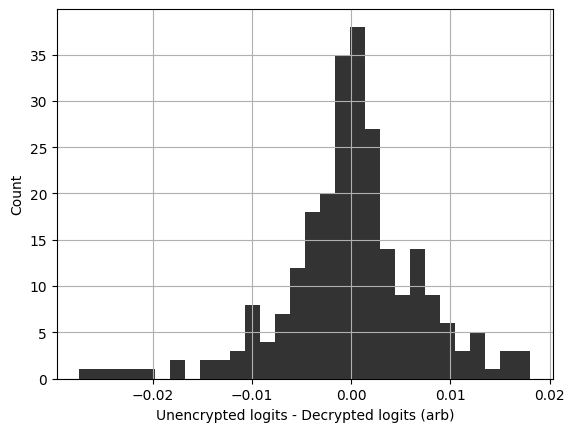

Finding the best model according to logs...
{'weights': 'weights/resnet32_cifar10', 'model_type': 'resnet32', 'kwargs': {'num_classes': 10, 'debug': False}, 'params': {'epochs': 100, 'batch_size': 256, 'momentum': 0.9, 'weight_decay': 0.256, 'weight_decay_bias': 0.004, 'ema_update_freq': 5, 'ema_rho': 0.9509900498999999, 'model_type': 'resnet32', 'kwargs': {'num_classes': 10, 'debug': False}}, 'run0': 0.9131, 'run1': 0.9127000000000001, 'run2': 0.9102, 'run3': 0.915, 'run4': 0.9129, 'accuracy': [0.91278, 0.001530228741071094]}

Average (5 runs): 91.278% +/- 0.153%
Best (idx 3): 0.915
resnet32          Mean     Std.   Percentage
conv            365.000   0.527      39.40
gelu             82.000   0.841       8.80
bootstrapping   450.000   2.069      48.60
residual          0.000   0.008       0.00
pool             27.000   0.074       2.90
linear            2.000   0.034       0.20
total           926.000   2.625     100.00
rounded percent  99.900
logit res        -0.000   0.007




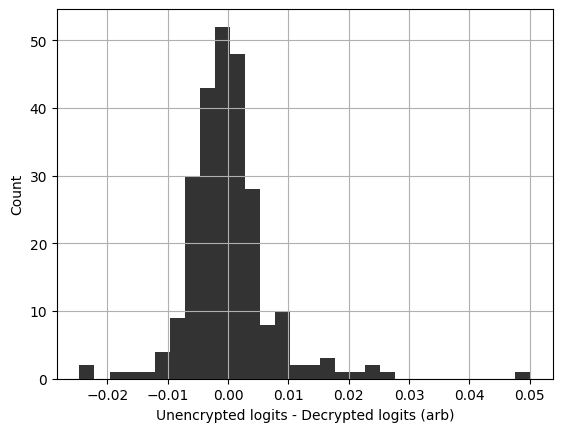

Finding the best model according to logs...
{'weights': 'weights/resnet44_cifar10', 'model_type': 'resnet44', 'kwargs': {'num_classes': 10, 'debug': False}, 'params': {'epochs': 100, 'batch_size': 256, 'momentum': 0.9, 'weight_decay': 0.256, 'weight_decay_bias': 0.004, 'ema_update_freq': 5, 'ema_rho': 0.9509900498999999, 'model_type': 'resnet44', 'kwargs': {'num_classes': 10, 'debug': False}}, 'run0': 0.9196000000000001, 'run1': 0.9184, 'run2': 0.9194, 'run3': 0.9196000000000001, 'run4': 0.918, 'accuracy': [0.9189999999999999, 0.0006693280212272797]}

Average (5 runs): 91.900% +/- 0.067%
Best (idx 0): 0.920
resnet44          Mean     Std.   Percentage
conv            487.000   0.724      40.10
gelu            106.000   1.614       8.70
bootstrapping   592.000   3.241      48.70
residual          0.000   0.012       0.00
pool             27.000   0.085       2.20
linear            2.000   0.083       0.20
total           1215.000   3.899     100.00
rounded percent  99.900
logit res     

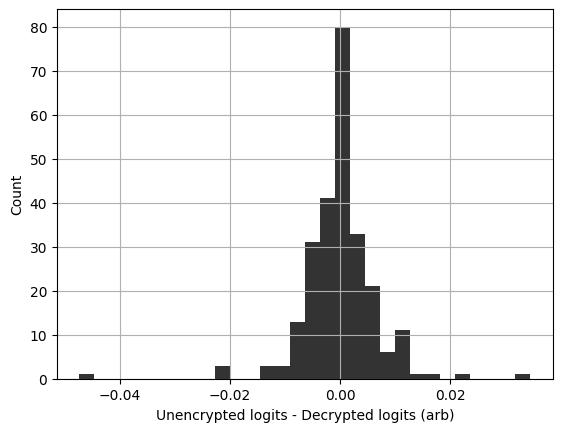

Finding the best model according to logs...
{'weights': 'weights/resnet56_cifar10', 'model_type': 'resnet56', 'kwargs': {'num_classes': 10, 'debug': False}, 'params': {'epochs': 100, 'batch_size': 256, 'momentum': 0.9, 'weight_decay': 0.256, 'weight_decay_bias': 0.004, 'ema_update_freq': 5, 'ema_rho': 0.9509900498999999, 'model_type': 'resnet56', 'kwargs': {'num_classes': 10, 'debug': False}}, 'run0': 0.9235000000000001, 'run1': 0.9194, 'run2': 0.9212, 'run3': 0.9204, 'run4': 0.8703000000000001, 'accuracy': [0.91096, 0.02037494539869983]}

Average (5 runs): 91.096% +/- 2.037%
Best (idx 0): 0.924
resnet56          Mean     Std.   Percentage
conv            609.000   0.981      40.60
gelu            128.000   1.318       8.60
bootstrapping   732.000   3.258      48.80
residual          1.000   0.010       0.00
pool             27.000   0.089       1.80
linear            2.000   0.030       0.10
total           1499.000   4.475     100.00
rounded percent  99.900
logit res         0.000   

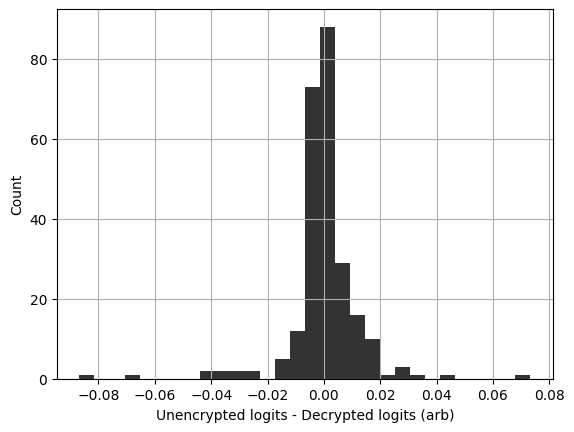

Finding the best model according to logs...
{'weights': 'weights/resnet110_cifar10', 'model_type': 'resnet110', 'kwargs': {'num_classes': 10, 'debug': False}, 'params': {'epochs': 100, 'batch_size': 64, 'momentum': 0.9, 'weight_decay': 0.256, 'weight_decay_bias': 0.004, 'ema_update_freq': 5, 'ema_rho': 0.9509900498999999, 'model_type': 'resnet110', 'kwargs': {'num_classes': 10, 'debug': False}}, 'run0': 0.8956000000000001, 'run1': 0.8966000000000001, 'run2': 0.8966000000000001, 'run3': 0.896, 'run4': 0.8938, 'accuracy': [0.8957200000000001, 0.001032279032045122]}

Average (5 runs): 89.572% +/- 0.103%
Best (idx 1): 0.897
resnet110         Mean     Std.   Percentage
conv            1160.000   1.197      41.60
gelu            234.000   2.097       8.40
bootstrapping   1366.000   5.036      49.00
residual          1.000   0.022       0.00
pool             27.000   0.099       1.00
linear            2.000   0.028       0.10
total           2790.000   6.853     100.00
rounded percent 100.100

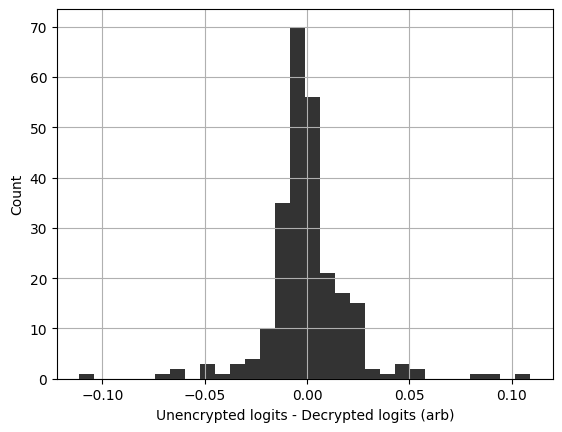

In [16]:
for model_type in model_types:

    logs = glob.glob("logs_no_overwrite/%s/%s/*.json" % (dataset, model_type))

    weights = get_best_weights(dataset, model_type)

    agg_data, resolutions = get_relevant_data(logs)
    
    print_stats(model_type, agg_data, resolutions)
    
    resolutions = np.array(resolutions).flatten()
    plot(data=resolutions, bins=30, xlabel="Unencrypted logits - Decrypted logits (arb)")

In [ ]:
def plot(data, bins, xlabel):
    plt.hist(data, bins=bins, color='black', alpha=0.8)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()
    


In [ ]:
xlabel_dict = {
    "conv" : "Convolution + BN",
    "gelu" : "GELU",
    "bootstrapping" : "Bootstrapping",
    "residual" : "Residual",
    "pool" : "Avg Pool",
    "linear" : "Linear",
    "total" : "Total Time"
}

In [ ]:
for k, v in agg_data.items():
    plot(v, 30, xlabel='%s Times (sec)'%xlabel_dict[k])